<a href="https://colab.research.google.com/github/jihyeon602/Medical-practice/blob/main/%ED%9D%89%EB%B6%80_X%EC%84%A0_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%ED%8F%90%EC%A7%88%ED%99%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Project] 흉부 X선 이미지 분류를 활용한 폐질환 예측

## 프로젝트 목표
- 흉부 X-ray 이미지를 분류하여 Opacity(X-ray 이미지 혼탁)를 통한 폐렴 여부를 예측하는 딥러닝 모델 수행
- 딥러닝 예측 결과 분석 및 딥러닝 모델 성능 평가 수행

## 프로젝트 목차
1. **데이터 준비 및 읽기:** 흉부 X-ray 이미지 데이터를 불러오고 확인

2. **딥러닝 모델 불러오기:** CNN 모델인 VGG16 과 MobileNetV2 불러오기

3. **데이터 전처리:** MobileNetV2 모델에 필요한 입력값 형식으로 데이터 처리

4. **딥러닝 모델 수행:** 사전학습된 MobileNetV2 모델로 흉부 X선 이미지 데이터셋 학습 수행

5. **평가 및 예측:** 딥러닝 성능 (정확도)평가 및 예측 결과 분석

## 데이터 출처
- 본 실습에서는 샌 디에고 대학에서 공개한 오픈 데이터셋을 활용합니다.

Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2

https://data.mendeley.com/datasets/rscbjbr9sj/2

## 프로젝트 개요

### X-ray 이미지 판독 과정

X-ray generator 에서 발사된 방사선이 Object(사람 신체)에 투과하는데 이 때 사람 내부 인체 조직에 따라 X-ray detector에 있는 image receptor에 투과되는 방사선 양이 다릅니다.

grayscale 이미지에서 인체 조직의 투과율이 높을수록 검은색, 낮을수록 흰색을 띕니다.

<img src="img/imageCapture.png" width="70%" height= "70%" title="cfmatrix"></img>

이미지 출처: https://slideplayer.com/slide/7432411


- Black: Air (공기는 잘 관통하므로 검은색)
- Dark-grey: Fat (물과 지방은 잘 관통하지 못하므로 회색)
- Light grey: Soft tissues, Water
- Off white: Bone (뼈는 거의 관통하지 못하므로 흰색)
- Opacity: Mass (없어야 하는 부분에 흰 부분으로 음영이 띈다면 종양, 혼탁 등을 의미)
- Bright white: Metal (금속)



### Opacity 개념

이 프로젝트에서는 딥러닝 알고리즘을 중심적으로 학습하고자 자세한 의학 정보 보다는 X-Ray의 혼탁에 집중하여 이미지 분류 작업을 수행하도록 하겠습니다.

폐렴(Pneumonia) 환자의 경우 X-ray 이미지 또는 CT 스캔을 판독할 때 폐가 위치한 부위에 음영이 증가(혼탁)하게 됩니다.

기관분기부(carina)를 기준으로 3-5cm 정도 떨어진 부분에서 정상적으로 나타나는 각도를 확인하여 정상적인 폐와 비정상적인 폐로 분류합니다. 정상적인 폐포의 내부는 기체로 이뤄진 상태이지만 폐렴으로 인해 손상되거나 염증이 있는 폐포에는 액체 물질로 가득 차 X-ray 촬영 시 불투명한 음영이 보이게 됩니다.


왼쪽 이미지: 정상(normal), 오른쪽 이미지: 폐렴(Pneumonia)

<img src="img/xray copy.png" width="70%" height= "70%" title="cfmatrix"></img>
             이미지 출처: https://www.bmj.com/content/370/bmj.m2426 <br>
내용 출처: https://www.ekjm.org/upload/42848541.pdf (서울대학교 의과대학 영상의학교실 - 전공의를 위한 흉부X선 사진 판독법)



### CNN 분류 모델 개념도



![alt text](https://adeshpande3.github.io/assets/Cover.png)

https://arxiv.org/ftp/arxiv/papers/1910/1910.13796.pdf

CNN 모델을 활용한 이미지 분류 작업은 입력 이미지에서 시작됩니다.

먼저, 입력 이미지가 convolution과 nonlinearity를 포함한 여러 convolution 레이어를 통과하면서 특징을 추출합니다. 이 과정에서 각 convolution 레이어는 이미지의 중요한 시각적 특징을 감지하고, max pooling 레이어는 공간적 크기를 줄여 중요한 정보를 강조합니다.

이후, 이 특징 맵들은 벡터로 변환되어 fully connected 레이어로 전달됩니다. fully connected 레이어에서는 추출된 특징들을 종합하여 다양한 클래스(예: 새, 일몰, 개, 고양이)에 대한 확률을 예측합니다. 최종적으로, 각 클래스에 대한 확률이 출력되어 이미지가 해당 클래스에 속할 가능성을 나타냅니다.

### CNN에서의 Convolution이란?

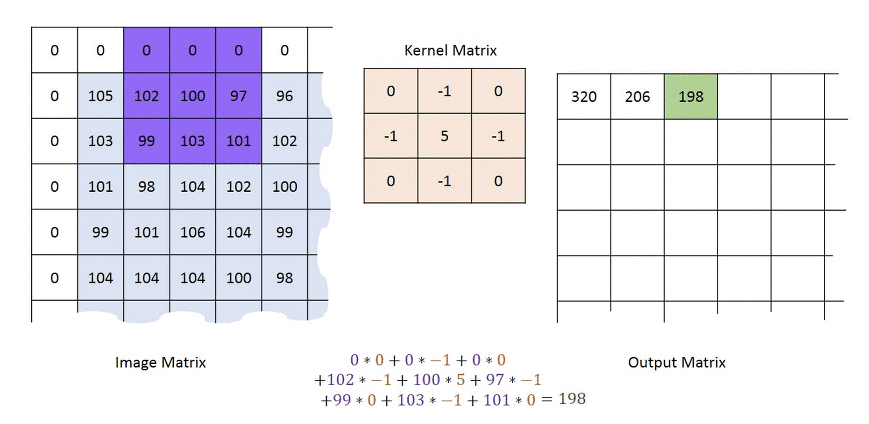

https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean/296701

Convolution은 CNN 모델에서 이미지의 특징을 추출하기 위해 필터(또는 커널)를 이미지의 각 위치에 적용하여 특징 맵(feature map)을 생성하는 연산입니다. 왼쪽에는 원본 이미지 매트릭스가 있으며, 그 위에 컨볼루션 커널 매트릭스가 겹쳐집니다. 커널 매트릭스는 이미지의 특정 영역에 대해 연산을 수행하는데 각 요소의 곱을 더한 결과가 오른쪽의 출력 매트릭스에 기록됩니다. 예를 들어, 이미지 매트릭스의 일부 영역과 커널 매트릭스의 요소들을 곱한 후 더한 값이 출력 매트릭스의 해당 위치에 채워집니다.

이 과정을 통해 이미지의 특징이 추출되어 출력 매트릭스에 반영됩니다.

### VGG16 구조

VGG (Visual Geometry Group)은 CNN 구조 중, 가장 이해하기 쉬우면서도 강력한 성능을 가진 CNN 모델 중 하나입니다.<br>
VGGNet의 특징은 모든 Convolution Layer에 3 x 3 convolution filter를 사용한 것이 특징입니다.<br>
<br>

VGGNet은 VGG16, VGG19 2개의 버전이 있는데 뒤에 숫자의 의미는 각각 16개, 19개의 Layer를 갖고 있다는 의미입니다. VGG16을 예로 들자면 아래와 같이 구성되어 있습니다.

이번 VGG는 기존 CNN 모델들과 달리 pooling layer를 추가해서 input 이미지의 축소를 위해서 채택되었습니다.


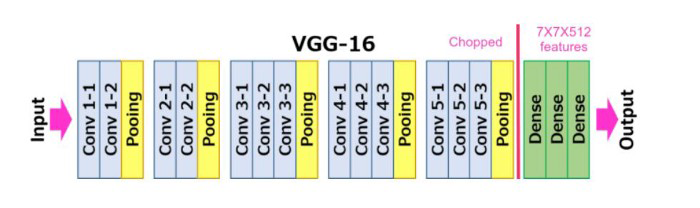
*   Convolution Layer 13개
*   Fully Connected Layer 3개
*   Pooling layer는 학습 가능한 parameter가 없기 때문에 레이어 개수(16)에 포함되지 않습니다.










---



# [0] GPU

이미지 처리를 더 빠르게 수행하기 위해 GPU를 활용합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#check GPU is well mounted
!nvidia-smi

Tue May 13 03:32:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# [1] 데이터 분석 준비

데이터 분석을 위해 데이터에 대한 기본 정보를 파악합니다.

In [3]:
pwd  # 현재 경로 확인

'/content'

In [4]:
ls  # 현재 경로 내용 확인

drive/  sample_data/




## 1.2. 데이터 파악



### 데이터 디렉토리 구성
1. /normal (정상)
2. /opacity (폐렴으로 인한 혼탁)

In [5]:
# 패키지 불러오기
# OpenCV는 이미지 히스토그램을 찾기 위한 함수 cv2.calcHist()를 제공한다.
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
dataDir = "/content/drive/MyDrive/의료데이터분석프로젝트/data"  # 데이터 위치
classNames = os.listdir(dataDir)  # 각 클래스의 이름들
numClass = len(classNames)  # 클래스 개수
print("Class names: ", classNames)
print("number of classes", numClass)

for tmp in range(len(classNames)):
    NImage = len(os.listdir(os.path.join(dataDir, classNames[tmp])))
    print("Class ", classNames[tmp], "has ", NImage, " of images.")

Class names:  ['normal', 'opacity']
number of classes 2
Class  normal has  1316  of images.
Class  opacity has  1318  of images.


In [7]:
os.listdir(os.path.join(dataDir, "opacity"))[:10]  # 파일명 몇개 확인해보기

['person679_virus_1270.jpeg',
 'person1106_virus_1829.jpeg',
 'person810_virus_1446.jpeg',
 'person293_virus_605.jpeg',
 'person1308_virus_2253.jpeg',
 'person633_virus_1213.jpeg',
 'person444_virus_911.jpeg',
 'person304_virus_625.jpeg',
 'person453_virus_936.jpeg',
 'person348_virus_719.jpeg']

파일의 이름을 봤을 때 이미지 상 혼탁(opacity)을 보이는 케이스가 세균(bacteria)성과 바이러스(virus)성으로 나뉩니다. 이번 실습에선 바이러스로 인한 폐렴에 집중하기 위해 혼탁 이미지 중 **바이러스성 폐렴에 해당하는 이미지 데이터만 활용**하도록 하겠습니다.

In [8]:
'''
def delete_non_virus_files(directory):
    try:
        # 디렉토리 내의 모든 파일과 디렉토리 목록을 가져옴
        for filename in os.listdir(directory):
            file_path = os.path.join(directory, filename)
            # 파일 이름에 'virus'가 포함되지 않으면 삭제
            if "virus" not in filename:
                if os.path.isfile(file_path):
                    os.remove(file_path)
                elif os.path.isdir(file_path):
                    # 디렉토리가 포함된 경우, 내부 파일들 재귀적으로 삭제
                    delete_non_virus_files(file_path)
                    # 디렉토리가 비어있으면 삭제
                    if not os.listdir(file_path):
                        os.rmdir(file_path)
                        print(f"Deleted directory: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


directory_path = os.path.join(dataDir, "opacity")
delete_non_virus_files(directory_path)
os.listdir(os.path.join(dataDir, "opacity"))[:10]  # 파일명 몇개 확인해보기'''

['person679_virus_1270.jpeg',
 'person1106_virus_1829.jpeg',
 'person810_virus_1446.jpeg',
 'person293_virus_605.jpeg',
 'person1308_virus_2253.jpeg',
 'person633_virus_1213.jpeg',
 'person444_virus_911.jpeg',
 'person304_virus_625.jpeg',
 'person453_virus_936.jpeg',
 'person348_virus_719.jpeg']

## 1.3 히스토그램(도수분포도)읽기

이미지 히스토그램은 밝기, 대비, 그리고 색감 분포 같은 이미지의 특성에 대해 감을 잡게해주는 좋은 도구입니다.

* 해당 히스토그램은 가로축(X축)으로 `0~255 `까지의 256개의 픽셀값 범위에 대해 세로축(Y축)으로 이미지가 가지고 있는 픽셀수를 나타냅니다.
* `0~25, 25~50, 50~5`와 같이 25씩 특정 간격이 있는 것으로 보아 이 간격을 히스토그램의 bin이라고 부릅니다. 이 히스토그램은 총 10개의 Bin을 갖고있습니다.
* Normal과 Opacity에 해당하는 이미지를 히스토그램으로 나타내면 픽셀값들이 `0~255` 범위에 골고루 분포합니다. 이 때, normal에 해당하는 이미지의 히스토그램 곡선이 Opacity 이미지의 곡선보다 더 원만한 것을 확인할 수 있습니다.
* 즉, Opacity 이미지의 히스토그램을 보면 픽셀값이 200~240 사이에 집중적으로 분포하고 있으며 상대적으로 선명도 (대비)가 낮고 불투명한 음영이 나타나는 것을 의미합니다.

normal data description
num of images 1316
sample image size (225, 225)
sample filename IM-0490-0001.jpeg


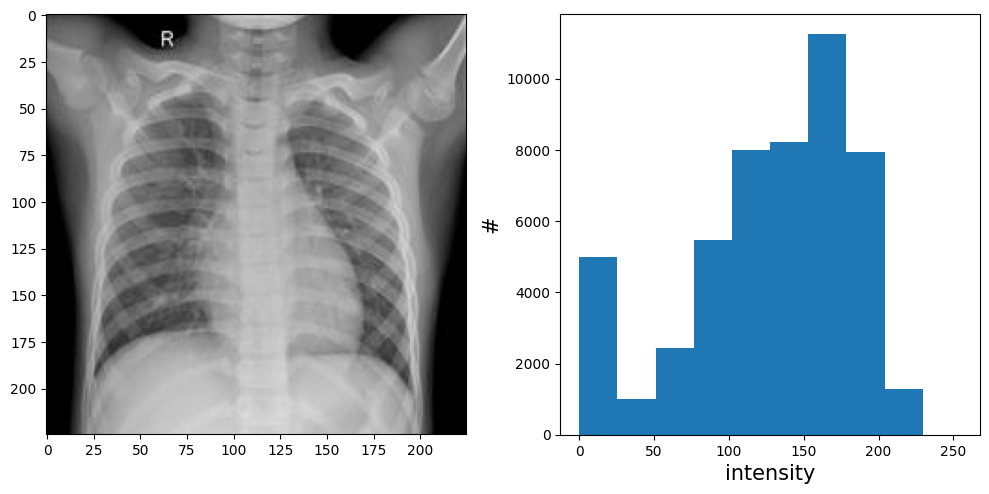

In [11]:
# normal
normal_list = os.listdir(os.path.join(dataDir, "normal"))
inum = np.random.randint(len(normal_list))
sampleImage = cv2.imread(os.path.join(dataDir, "normal", normal_list[inum]), 0)

print("normal data description")
print("num of images", len(normal_list))
print("sample image size", np.shape(sampleImage))
print("sample filename", normal_list[inum])


# plt.hist() 함수는 grayscale 이미지에 대한 히스토그램을 바로 그려주고 이를 plt.plot() 함수를 이용해 화면에 그려준다.
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(sampleImage, cmap="gray")
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel("intensity", fontsize=15)
plt.ylabel("#", fontsize=15)
plt.tight_layout()
plt.show()

Opacity data description
num of images 1318
sample image size (225, 225)
sample filename person593_virus_1142.jpeg


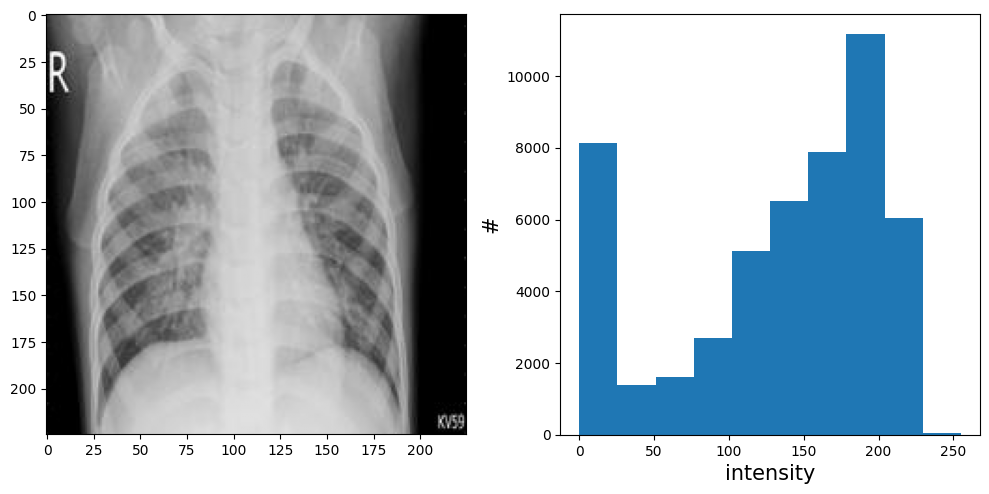

In [12]:
# Opacity 이미지와 픽셀값 분포 그려보기
Opacity_list = os.listdir(os.path.join(dataDir, "opacity"))
inum = np.random.randint(len(Opacity_list))
sampleImage = cv2.imread(os.path.join(dataDir, "opacity", Opacity_list[inum]), 0)

print("Opacity data description")
print("num of images", len(Opacity_list))
print("sample image size", np.shape(sampleImage))
print("sample filename", Opacity_list[inum])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(sampleImage, cmap="gray")
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel("intensity", fontsize=15)
plt.ylabel("#", fontsize=15)
plt.tight_layout()
plt.show()

# [2] VGG16를 이용한 Architecture 구성 실습



* input 이미지가 16개의 convolutional layer를 통과하면서 각 이미지가 가진 특징(feature)을 추출하여 학습합니다.
* 모델이 학습을 해서 내놓은 output은 classifier의 softmax가 내놓는 값이며, 이는 input 이미지가 각 class에 속할 확률값을 의미합니다.

![VGG16 네트워크 구조](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

## 2.1 VGG16에서 16개의 layer 찾고 VGG16 구조 파악하기

In [9]:
# 패키지 불러오기
import numpy as np
import tensorflow as tf

In [10]:
# 패키지 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model

## 2.2 순서가 섞인 layer들을 VGG16 구성에 맞게 배치하기

In [11]:
model = Sequential()
model.add(
    Conv2D(
        input_shape=(224, 224, 3),
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        activation="relu",
    )
)
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [14]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [15]:
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [16]:
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [17]:
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1000, activation="sigmoid"))

In [18]:
input_shape = (None, 32, 32, 3)
model.build(input_shape)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,290,344 (165.14 MB)

 Trainable params: 43,290,344 (165.14 MB)

 Non-trainable params: 0 (0.00 B)

## 2.3 VGG 모델 불러오기(위에 만든 것과 비교해보기)

In [19]:
# 패키지 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model

In [20]:
from tensorflow.keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()
input_shape = (None, 32, 32, 3)
# 모델의 모양을 보여준다.
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## 2.4 keras 에서 제공되는 모델들

keras에서 제공되는 딥러닝 모델들은 아래 링크에서 확인할 수 있습니다.
* https://keras.io/applications/

### 시대별, State-of-the-art 모델들의 성능 변화

![image.png](attachment:image.png)

## 2.5 빠른 학습을 위한 가벼운 모델, MobileNet V2 불러오기

|Model|Model Size (MB)|Top-5 Accuracy (%)|Inference time (ms)|
|------|:----:|:---:|---|
|VGG-16|527.0|90.05|2000|
|MobileNetV2|13.8|90.06|118|

MobileNetV2는 기존 MobileNet에서 CNN구조를 약간 더 수정하여 파라미터 수와 연산량을 더욱 줄이면서 기존의 MobileNet, ShuffleNet보다 더 우수한 성능을 보이는 네트워크입니다.

In [21]:
from tensorflow.keras.applications import MobileNetV2

model = MobileNetV2()

model.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

# [3] Chest X-ray 데이터셋 전처리 하기

## 3.1 Dataset 나누기 (Internal Split Validation)
* Train / Validation / Test <br>
머신러닝의 성능을 평가하기 위해서 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터로 나누어 사용합니다. <br>
정답지(label)가 있는 Train과 Validation 데이터를 기반으로 학습된 모델이 최종적으로 Test 데이터를 분류해서 예측합니다.

그리하여 예측된 결과값과 테스트 데이터의 실제 결괏값을 비교하여 머신러닝 모델의 성능을 평가할 수 있습니다.

---


* **Train**: 딥러닝 모델의 개발을 위해 모델이 학습하기 위한 데이터셋

* **Validation**: Training 데이터로 학습된 모델의 성능 검증을 위한 데이터 셋

* **Test**:학습된 최종적인 모델의 성능을 평가하기 위해 새로운 데이터로 검증하여 앞으로 새로운 데이터를 사용하여 학습할 정확도를 예측하기 위해  

#### Validation과 Test 데이터의 차이
Validation 데이테셋은 Train-data로 학습후에 만들어진 모델이 잘 예측을 하는지 그 성능을 평가하고 최종 모델을 선정하기 위해 훈련 과정에 관여하고 Test 데이터셋은 훈련 과정에 관여 하지 않습니다.



![image.png](attachment:image.png)

* Random Split Validation: 한 Cohort 내에서의 무작위적 Split validation<br>
* Consecutive Split Validation: 시간 순서대로 모집한 데이터의 Split validation<br>
* External validation (Multi-center validation): 서로 다른 집단에서 구성된 데이터로의 Validation<br>

In [22]:
# shutil 라이브러리를 사용하여 다른 디렉토리 내에 특정 파일을 모두 복사를 할 때 경로가 없을 때, 폴더를 생성하면서 지정된 위치로 파일을 복사할 수 있습니다.
import shutil

try:
    shutil.rmtree("dataset")
except:
    pass

In [23]:
print(classNames)

['normal', 'opacity']


In [27]:
dataDir

'/content/drive/MyDrive/의료데이터분석프로젝트/data'

In [29]:
# 현재 opacity 폴더에 바이러스/박테리아 이미지가 있음
base_opacity_dir = os.path.join(dataDir, 'opacity')
bacteria_dir = os.path.join(dataDir, 'opacity_bacteria')
virus_dir = os.path.join(dataDir, 'opacity_virus')

# 대상 폴더 생성
os.makedirs(bacteria_dir, exist_ok=True)
os.makedirs(virus_dir, exist_ok=True)

# 파일 이름 기준으로 분류
for fname in os.listdir(base_opacity_dir):
    src = os.path.join(base_opacity_dir, fname)
    if 'bacteria' in fname.lower():
        shutil.copyfile(src, os.path.join(bacteria_dir, fname))
    elif 'virus' in fname.lower():
        shutil.copyfile(src, os.path.join(virus_dir, fname))

In [55]:
classNames = ['normal', 'opacity_virus']

In [ ]:
import tqdm
import random

trainFrac = 0.7
validFrac = 0.1  # Define the fraction of images to move to validation dataset
testFrac = 0.2  # Define the fraction of images to move to test dataset

for tmp in tqdm.tqdm(range(len(classNames))):
    os.makedirs(os.path.join("/content/dataset/train", classNames[tmp]))
    os.makedirs(os.path.join("/content/dataset/valid", classNames[tmp]))
    os.makedirs(os.path.join("/content/dataset/test", classNames[tmp]))

    filelist_tmp = os.listdir(os.path.join(dataDir, classNames[tmp]))
    random.shuffle(filelist_tmp)
    train_N = int(len(filelist_tmp) * trainFrac)
    valid_N = int(len(filelist_tmp) * validFrac)
    test_N = len(filelist_tmp) - train_N - valid_N

    trainList_tmp = filelist_tmp[:train_N]
    validList_tmp = filelist_tmp[train_N : train_N + valid_N]
    testList_tmp = filelist_tmp[train_N + valid_N :]

    for tmp2 in range(len(trainList_tmp)):
        shutil.copyfile(
            os.path.join(dataDir, classNames[tmp], trainList_tmp[tmp2]),
            os.path.join("/content/dataset/train", classNames[tmp], trainList_tmp[tmp2]),
        )
    for tmp2 in range(len(validList_tmp)):
        shutil.copyfile(
            os.path.join(dataDir, classNames[tmp], validList_tmp[tmp2]),
            os.path.join("/content/dataset/valid", classNames[tmp], validList_tmp[tmp2]),
        )
    for tmp2 in range(len(testList_tmp)):
        shutil.copyfile(
            os.path.join(dataDir, classNames[tmp], testList_tmp[tmp2]),
            os.path.join("/content/dataset/test", classNames[tmp], testList_tmp[tmp2]),
        )

    print("")
    print("Class: ", classNames[tmp])
    print("num of train set: ", len(trainList_tmp))
    print("num of valid set: ", len(validList_tmp))
    print("num of test set: ", len(testList_tmp))

## 3.2 Image Data Generator 정의

###### Keras API - ImageDataGenerator: 일정한 규칙으로 만들어진 폴더구조에서 데이터셋을 자동으로 불러와 학습에 사용할 수 있게 도와주는 API

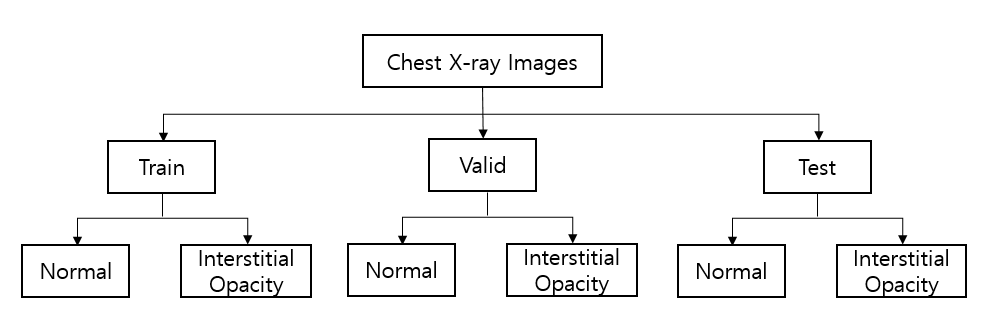

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/dataset/train"
valid_dir = "/content/dataset/valid"
test_dir = "/content/dataset/test"

image_size = 128
batch_size = 32

# 학습에 사용될 이미지 데이터 생성기: ImageDataGenerator
# Keras에서 제공하는 Online-augmentation tool인 Generator
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=3,
    width_shift_range=0.01,
    height_shift_range=0.10,
    zoom_range=0.05,
    fill_mode="nearest",
)

# 검증에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(rescale=1 / 255)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(rescale=1 / 255)

# 학습에 사용될 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
)

# 검증에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 1843 images belonging to 3 classes.
Found 262 images belonging to 3 classes.
Found 529 images belonging to 3 classes.


## 3.3 데이터 증강 기법 알고 넘어가기

#### 이미지 증강(Data Augmentation) 이란?
이미지 증강이란 각 질환에 대해 수집된 데이터의 균형이 맞지 않거나(편향) 과적합 문제를 해결하기 위해 사용되는 방법입니다.
또한, 의료 영상이미지 획득시 개인정보 문제 등으로 원천 데이터를 추가로 구하기 어려울 때 사용합니다.
전통적 영상처리 기반 증강기법과 최신 데이터 증강 기법으로 분류할 수 있습니다.

최신 기법 중 GAN의 비지도학습 방식의 알고리즘은 학습이 완료된 뒤에 학습된 생성기만 떼어 영상을 생성하여 인공지능 학습에 필요한 영상을 무한히 만들어 내서 학습 결과 향상이 가능합니다.

- 전통적 영상처리 기반 증강 기법:  회전, 색 변환, Blur를 통해 밝기나 공간적 정보 변형
- 최신 데이터 증강 기법:
    - GAN 기반 증강 기법: 조건 변수를 넣어 generator 와 discriminator 두 계층이 데이터를 생성하고 판별하는 과정을 반복하며 정교한 데이터를 생성
        - 생성기 (generator): 무작위 노이즈를 초기값으로 입력 받아 영상 생성
        - 판별기(discriminator): 영상의 특징 학습, 실제와 합성을 판별하여 업데이트
    - Cutout : 최적의 마스크 크기를 찾아 영상의 일부분을 무작위로 가리는 데이터 증강 기법
        - 10개 클래스(16 * 16 크기 마스크 사용), 100개의 클래스(8 * 8 크기 마스크 사용)
    - Mixup: 두 개의 서로 다른 클래스에 해당하는 데이터를 하나로 섞는 방식으로 데이터를 증강
    - Cutmix  잘라낸 부분에 다른 클래스의 영상을 붙여서 증강
    - Augmix : 원본 영상의 의미론적 속성을 보존하며 여러 이미지를 만들어 픽셀 단위의 볼록 조합(convex combinations)을 통해 하나의 영상으로 합침

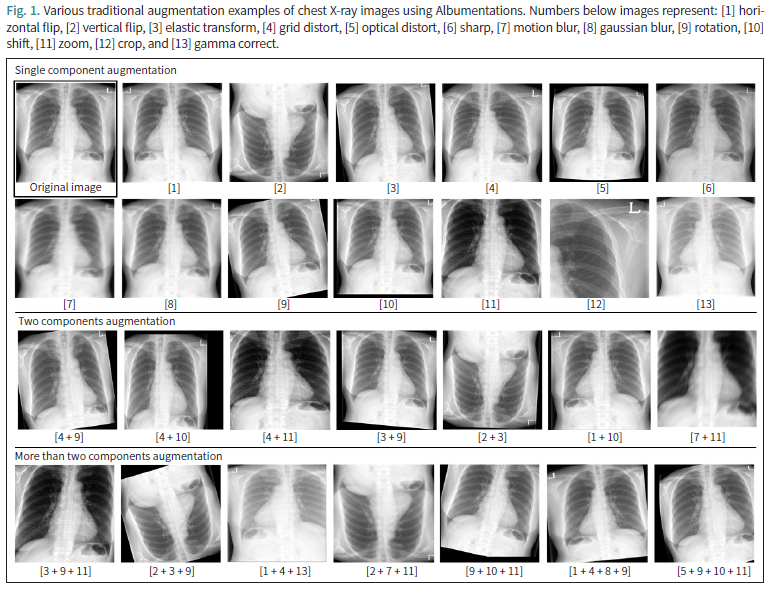

https://jksronline.org/pdf/10.3348/jksr.2020.0158



### 3.3.1 GAN의 랜덤 노이즈 매커니즘


**CNN을 이용한 이미지 생성기(모델 PGGAN)를 학습해, 합성 이미지 생성**

1. CNN을 이용한 이미지 생성기 (PGGAN)을 학습하여 Generator 와 Discriminator 로 랜덤 노이즈를 확인합니다.

2. Generator는 이미지와 같은 데이터를 생성해내고, 그 뒤에 붙어있는 것은 Discriminator로, Generator가 생성한 데이터를 분석해서 '진짜' 혹은 '가짜'를 판명하는 모델입니다. Generator(생성기)와 Discriminator(판독기)의 역할을 예시로 다음과 같이 설명될 수 있습니다.


> 지폐위조범(Generator)은 경찰을 최대한 열심히 속이려고 하고 다른 한편에서는 경찰(Discriminator)이 이렇게 위조된 지폐를 진짜와 감별하려고(Classify) 노력한다. 이런 경쟁 속에서 두 그룹 모두 속이고 구별하는 서로의 능력이 발전하게 되고 결과적으로는 진짜 지폐와 위조 지폐를 구별할 수 없을 정도(구별할 확률 =0.5)에 이른다는 것.



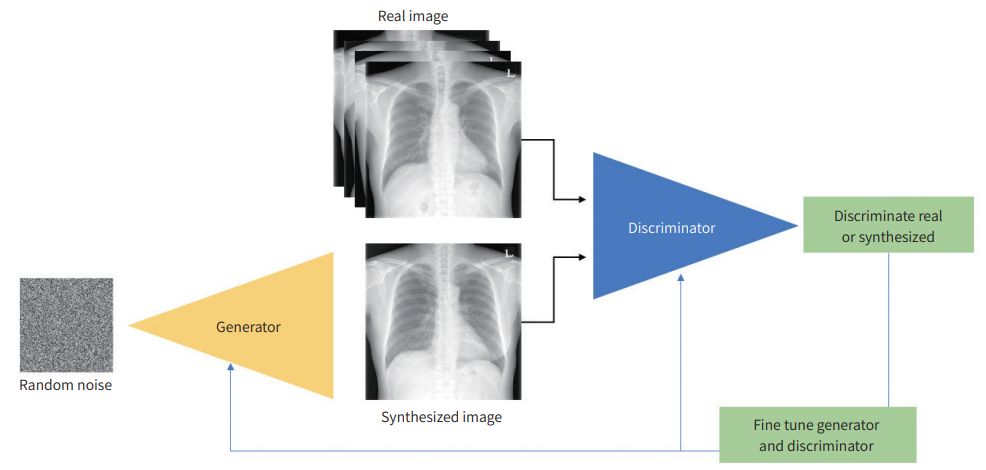

https://jksronline.org/pdf/10.3348/jksr.2020.0158

# [4] 사전 학습된 MobileNet 모델을 활용한 전이 학습

In [40]:
# 패키지 불러오기
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model

K.clear_session()  # 새로운 세션으로 시작

이번에는 ImageNet 데이터셋으로 사전 학습된 MobileNetV2 모델을 불러와서 활용해보겠습니다. 이렇게 사전에 학습되어있는 모델을 불러온 뒤 모델 내부의 가중치들을 새로운 문제에 맞게 조정하여 사용하는 기법을 전이 학습이라고 합니다. 전이 학습을 통해 적은 양의 X-ray 데이터로도 높은 성능을 달성하도록 하며 훈련 시간을 단축합니다.

`include_top=False`을 통해 최상위 분류 레이어를 제외하고 모델의 기본 구조만 가져와 활용하며, `input_shape=(image_size, image_size, 3)`을 통해 입력 이미지의 크기와 채널 수를 정의합니다.



In [41]:
# 새로운 세션으로 시작했기에 다시 모델 불러오기
MobileNet_model = MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3)
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
numClass = 2

In [49]:
# VGG16모델의 Fully Connected를 재구성해서 추가(이진분류 문제로 바꿔줌)
x = Flatten()(MobileNet_model.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation="softmax")(x)

model = Model(MobileNet_model.input, pred)

In [50]:
# 새로운 모델 요약
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 23,232,578 (88.63 MB)

 Trainable params: 23,198,466 (88.50 MB)

 Non-trainable params: 34,112 (133.25 KB)

학습 과정에서 모델의 성능을 모니터링하고 최적화하기 위해 다양한 콜백을 설정합니다.

- ModelCheckpoint: 최상의 검증 손실 시 가중치를 저장
- ReduceLROnPlateau: 검증 손실 개선이 없을 때 학습 속도를 줄임
- EarlyStopping: 검증 손실이 개선되지 않으면 학습을 중지
- PlotLossesKeras: 학습 중 손실을 실시간으로 시각화
- CSVLogger: 학습 기록을 CSV 파일에 저장

In [44]:
!pip install livelossplot

In [51]:
import os
import shutil
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
from livelossplot import PlotLossesKeras, PlotLosses
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint,
    Callback,
    CSVLogger,
)


# PlotLossesKeras 콜백 정의
class PlotLossesKeras(tf.keras.callbacks.Callback):
    def __init__(self):
        self.liveplot = PlotLosses()

    def on_epoch_end(self, epoch, logs=None):
        self.liveplot.update(logs)
        self.liveplot.draw()


datapath = "/content/output"
FOLDER = "study3"  # 코드 수정 후 재학습을 할 시에 폴더 명을 변경해줍니다

epochs = 10
save_period = 1  # epoch

train_N = train_generator.n
valid_N = valid_generator.n
test_N = test_generator.n

steps_per_epoch = int(train_N / batch_size)
validation_steps = int(valid_N / batch_size)
test_steps = np.ceil(test_N / batch_size).astype(int)

try:
    shutil.rmtree(os.path.join(datapath, FOLDER))
except:
    pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, "weights")):
    os.makedirs(os.path.join(datapath, FOLDER, "weights"))

CP = ModelCheckpoint(
    filepath=os.path.join(
        datapath,
        FOLDER,
        "weights",
        "train_weights_epoch_{epoch:03d}-{loss:.4f}-{val_loss:.4f}.keras",
    ),
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="min",
)
LR = ReduceLROnPlateau(monitor="val_loss", factor=0.8, patience=2, verbose=1, min_lr=1e-8)
hist = tf.keras.callbacks.History()
csv_log = os.path.join(os.path.join(datapath, FOLDER), "training.csv")

early_stop = EarlyStopping(monitor="val_loss", patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.8, patience=50, verbose=1, min_delta=1e-4
)

callbacks_list = [
    CP,
    LR,
    hist,
    PlotLossesKeras(),
    CSVLogger(csv_log, append=False, separator=";"),
]

# 모델 컴파일
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["acc"],
)

In [52]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    verbose=1,
)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 3), output.shape=(None, 2)

학습 과정에서 저장된 가중치들을 확인합니다.

In [40]:
from natsort import natsorted

weight_list = os.listdir(os.path.join(datapath, FOLDER, "weights"))  # 저장한 weight리스트 만들기
weight_list_sorted = natsorted(weight_list, key=lambda x: x[30:])  # validation loss를 기준으로 정렬

# weight리스트 확인하기
print("number of weights:", len(weight_list_sorted))
for tmp in weight_list_sorted:
    print(tmp)

BestModel = weight_list_sorted[-1]

number of weights: 2
train_weights_epoch_002-0.0687-0.8987.keras
train_weights_epoch_001-0.7004-1.4183.keras


# [5] 학습된 MobileNetV2 모델로 Test 데이터 결과 예측하기


학습된 모델을 이용해 Test 데이터 결과를 예측합니다.

In [41]:
# weight불러오기
model.load_weights(os.path.join(datapath, FOLDER, "weights", BestModel))

In [42]:
import pandas as pd

# import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
# For prediction purposes
y_pred = model.predict(test_generator, steps=test_steps, verbose=1)
y_pred_labels = np.argmax(y_pred, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step


## 5.1 Prediction 분류 성능 평가하기





## 분류결과표(Confusion Matrix)

분류결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지를 갯수로 센 결과를 표나 나타낸 것입니다. 정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타냅니다.



<img src="img/cfmatrix.png" width="80%" height= "80%" title="cfmatrix"></img>


예를 들어 정답인 y값 y_true와 분류 모형이 예측한 값 y_pred가 다음과 같다고 해봅시다.

```python
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

```
첫 행은 실제로 정상인 두개의 데이터가 둘 다 정확하게 정상으로 예측되었다는 뜻이며, 두번째 행은 실제로 opacity인 하나의 데이터가 부종으로 분류되었다는 뜻입니다. 마지막 행은 실제로 부종인 데이터 3개 중 2개만 정확하게 부종으로 분류되었고 하나는 정상으로 분류되었다는 뜻입니다.


이 때 분류결과표는 다음과 같아집니다.

```python
confusion_matrix(y_true, y_pred)
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```





## 이진 분류 결과표

클래스가 0과 1 두 종류 밖에 없는 이진 분류의 경우에는 일반적으로 클래스 이름을 양성(Positive)와 음성(Negative)로 표시합니다. 이 때의 결과를 나타내는 이진 분류결과표(Binary Confusion Matrix)는 다음과 같습니다.
<img src="img/binarymatrix.png" width="70%" height= "70%" title="cfmatrix"></img>


분류 모형의 예측 결과가 맞은 경우, 즉 양성을 양성이라고 예측하거나 음성을 음성이라고 예측한 경우에는 참(True)라고 합니다.

예측 결과가 틀린 경우, 즉 양성을 음성이라고 예측하거나 음성을 양성이라고 예측한 경우에는 거짓(False)이라고 합니다.

In [44]:
# get labels of test dataset
y_test = test_generator.labels

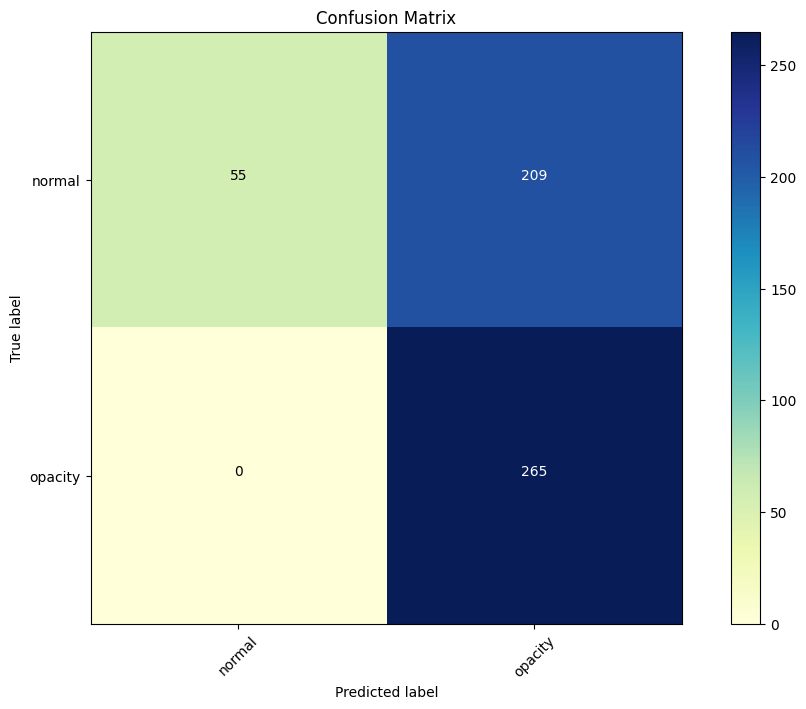

In [45]:
import itertools

cm = confusion_matrix(y_test, y_pred_labels)

classNames = ["normal", "opacity"]
df_cm = pd.DataFrame(cm, index=classNames, columns=classNames)
df_cm = pd.DataFrame(cm)

plt.figure(figsize=(10, 7))
plt.imshow(df_cm, interpolation="nearest", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j], "d"),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

위 confusion matrix에서 x 축은 실제 데이터의 label (Real Data)을 의미하고 y 축은 예측한 데이터의 label (Prediction)을 의미합니다.

- **normal, normal 의 값:** `위험 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `위험 없음(Pass)`인 경우의 개수
- **normal, Opacity 의 값:** `위험 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `위험 없음(Pass)`인 경우의 개수
- **Opacity, normal 의 값:** `위험 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `위험 있음(Fail)`인 경우의 개수
- **Opacity, Opacity 의 값:** `위험 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `위험 있음(Fail)`인 경우의 개수

## 5.2 딥러닝 결과를 이미지 차원에서 해석하기(feat. GradCAM)


**Grad-CAM: Why did you say that? Visual Explanations from Deep Networks via Gradient-based Localization**
Ramprasaath R. Selvaraju, Abhishek Das, Ramakrishna Vedantam, Michael Cogswell, Devi Parikh, Dhruv Batra
https://arxiv.org/abs/1610.02391

**Example: 'Boxer'**

![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog.png)
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_gradcam.jpg)
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_guided_gradcam.jpg)

CAM(Class Activation Mapping)은 CNN기반 네트워크에서 많은 클래스를 결정할 때, 시각적인 설명을 제공합니다. 예를 들어 학습한 네트워크가 이미지를 개 또는 고양이라고 판별할 때 각각 이미지에서 중요하게 생각하는 영역이 다를 겁니다. 이를 시각화해주는 알고리즘이 바로 CAM 입니다.

Grad-CAM (Gradient-weighted CAM)은 CAM을 구할 때 예측 이미지 안의 중요한 부분을 강조하는 대략적인 피처맵을 생산하기 위해 마지막 컨볼루션 층으로 흘러가는 타겟글래스에 대한 gradient를 이용합니다. CNN 구조에서 마지막 컨볼루션 피처맵이 가진 정보량이 많고, 원본 이미지에서 많은 부분을 요약한 결과이기 때문에 마지막 layer만으로 원인 분석이 가능합니다.

이미지 분류 결과에 따라 CAM에 활용되는 Weight 가 달라집니다. 여기서 weight의 물리적 의미로는 예측을 하기 위해서 지역 맵들의 중요도라 할 수 있으며 타깃 gradient로 구할 수 있습니다. Grad-CAM은 요약된 마지막 정보와 그 정보를 예측할 때 Weight를 가진다면 바로 수행할 수 있습니다.


Grad-CAM을 사용하는 이유

1. 예측 결과에 대한 원인을 분석하고 향후 대처하기 위해
2. 구축한 예측 모델 결과가 타당함을 직관적으로 확인하기 위해
3. 실패된 예측에 대해서 이미지의 어떤 부분이 CNN을 최종 분류 결정으로 이끌었는지 이해하기 위해

In [46]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model(
        [input_model.inputs],
        [input_model.get_layer("block_13_expand").output, input_model.output],
    )
    # MobileNetV2의 경우, Layer name: block5_conv3
    # 입력과 예측 결과의 conv layer 층 개수 일치시키기 위해 마지막 층을 사용하지 않습니다.
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(
            image
        )  # MobilenetV2의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]  # 예측 벡터에서 해당 클래스 항목

    grads = tape.gradient(
        output, last_conv_outputs
    )  # MobilenetV2의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터

    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):  # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:, :, i] *= w

    heatmap = np.mean(last_conv_outputs, axis=-1)  # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵

    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (image_size, image_size))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)

    return np.uint8(cam), heatmap, predicted_label

In [47]:
# class에 대응하는 index알아내기
print(test_generator.class_indices)
Opacity_idx = test_generator.class_indices.get("Opacity")
normal_idx = test_generator.class_indices.get("normal")

{'normal': 0, 'opacity': 1}


먼저 opacity에 해당하는 이미지에 대한 GradCam을 출력해보겠습니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


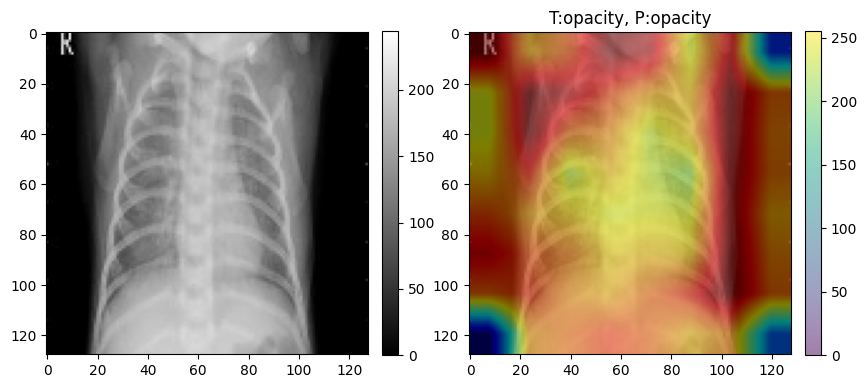

In [48]:
import keras
import tensorflow as tf

# Select a random query image+
testList = os.listdir(os.path.join(dataDir, "opacity"))
inum = np.random.randint(len(testList))
qimage = cv2.imread(os.path.join(dataDir, "opacity", testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage = qimage.reshape((1, image_size, image_size, 3))
qimage = qimage / 255.0

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
    pred_title = "normal"
else:
    pred_title = "opacity"

print(idx)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(ori_image, cmap="gray")
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title("T:" + "opacity" + ", P:" + pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

이어서 normal인 이미지의 GradCam을 출력해보겠습니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


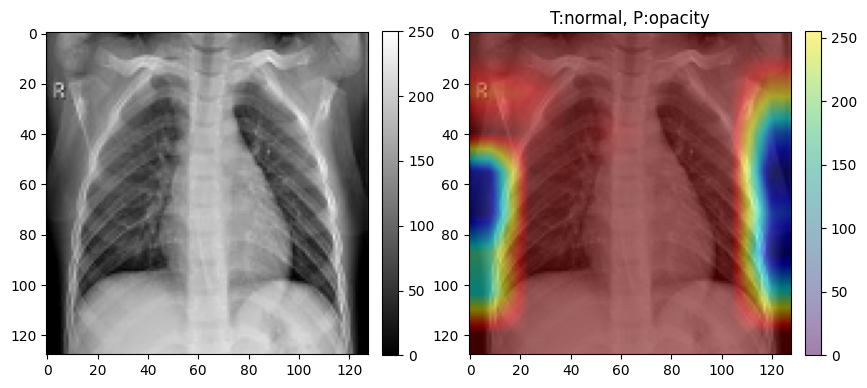

In [49]:
import tensorflow as tf

# Select a random query image+
testList = os.listdir(os.path.join(dataDir, "normal"))
inum = np.random.randint(len(testList))
qimage = cv2.imread(os.path.join(dataDir, "normal", testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage = qimage.reshape((1, image_size, image_size, 3))
qimage = qimage / 255.0

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
    pred_title = "normal"
else:
    pred_title = "opacity"

print(idx)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(ori_image, cmap="gray")
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title("T:" + "normal" + ", P:" + pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

normal인 이미지 중 예측에 성공한(predict 역시 normal) 이미지에 대해 GradCam을 출력해보겠습니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


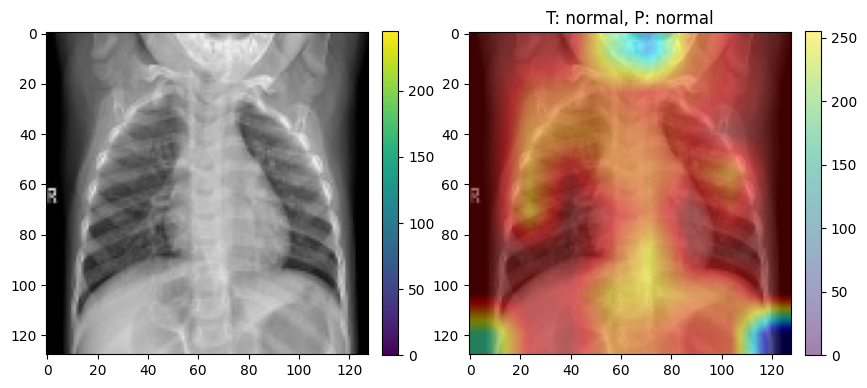

In [50]:
# 모든 'normal' 이미지 목록
testList = os.listdir(os.path.join(dataDir, "normal"))


# 조건을 충족하는 이미지를 찾는 함수
def find_normal_image(testList, dataDir, image_size, normal_idx):
    while True:
        inum = np.random.randint(len(testList))
        qimage = cv2.imread(os.path.join(dataDir, "normal", testList[inum]))
        qimage = cv2.resize(qimage, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
        ori_image = qimage.copy()

        # 예측을 위한 이미지 준비
        qimage = qimage.reshape((1, image_size, image_size, 3))
        qimage = qimage / 255.0

        # 클래스 예측
        preds = model.predict(qimage)
        idx = np.argmax(preds[0])

        # 예측과 실제가 모두 'normal'인지 확인
        if idx == normal_idx:
            return ori_image, qimage, "normal"


# 적절한 'normal' 이미지 찾기
ori_image, qimage, pred_title = find_normal_image(testList, dataDir, image_size, normal_idx)

# Grad-CAM 시각화 생성
cam, heatmap, plabel = grad_cam(model, qimage)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(ori_image)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title("T: normal, P: " + pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

<span style="color:rgb(120, 120, 120)">
본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.
    
Copyright @ elice all rights reserved
</span>